In [1]:
import pandas as pd

df = pd.read_csv("../../datasets/chexpert/1/train.csv")

In [2]:
# give me some data insights from this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13  Atelectasis   

In [3]:
### <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 223414 entries, 0 to 223413
# Data columns (total 19 columns):
#  #   Column                      Non-Null Count   Dtype
# ---  ------                      --------------   -----
#  0   Path                        223414 non-null  object
#  1   Sex                         223414 non-null  object
#  2   Age                         223414 non-null  int64
#  3   Frontal/Lateral             223414 non-null  object
#  4   AP/PA                       191027 non-null  object
#  5   No Finding                  22381 non-null   float64
#  6   Enlarged Cardiomediastinum  44839 non-null   float64
#  7   Cardiomegaly                46203 non-null   float64
#  8   Lung Opacity                117778 non-null  float64
#  9   Lung Lesion                 11944 non-null   float64
#  10  Edema                       85956 non-null   float64
#  11  Consolidation               70622 non-null   float64
#  12  Pneumonia                   27608 non-null   float64
#  13  Atelectasis                 68443 non-null   float64
#  14  Pneumothorax                78934 non-null   float64
#  15  Pleural Effusion            133211 non-null  float64
#  16  Pleural Other               6492 non-null    float64
#  17  Fracture                    12194 non-null   float64
#  18  Support Devices             123217 non-null  float64
#  based on the above information, what are the missing value counts for each column?
df.isnull().sum()

Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64


===== BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   flo

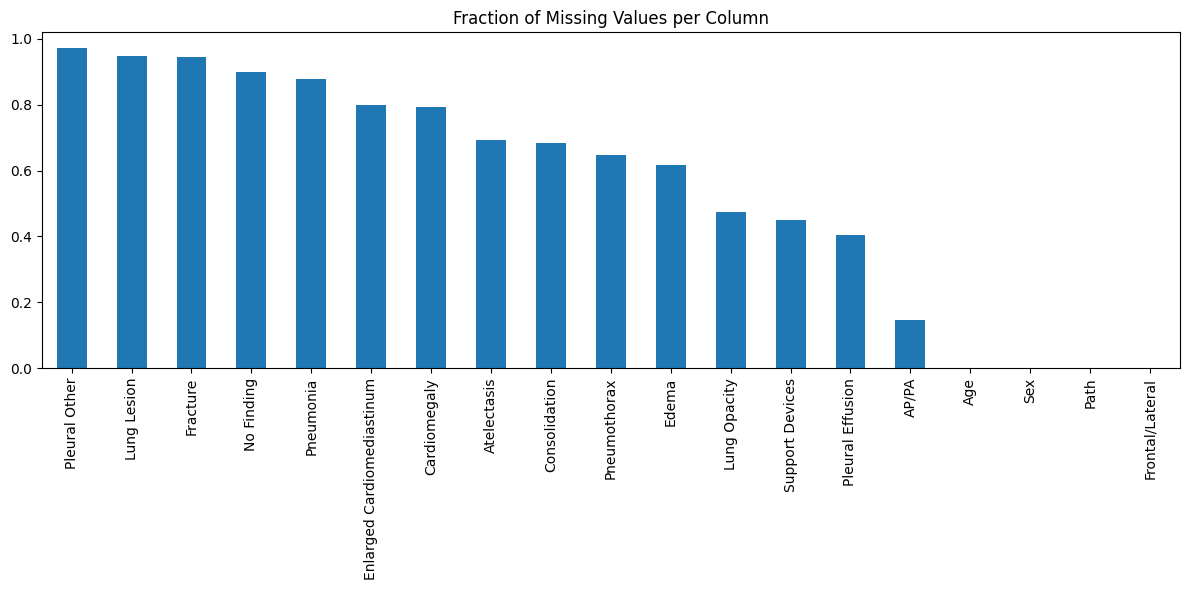

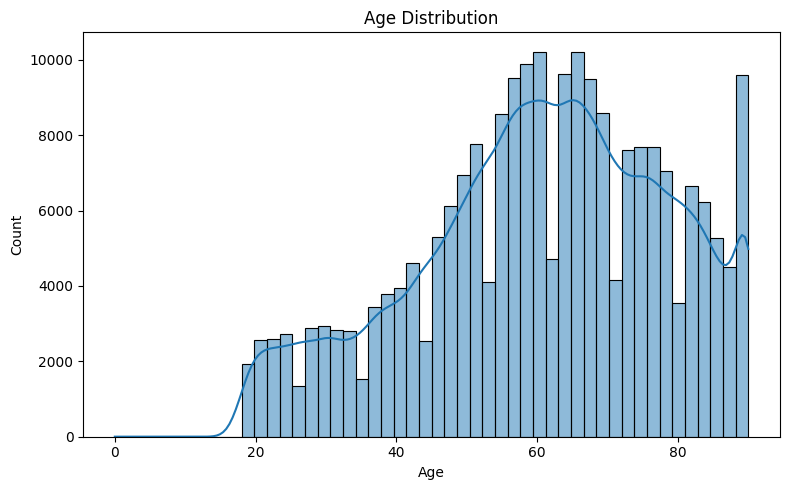

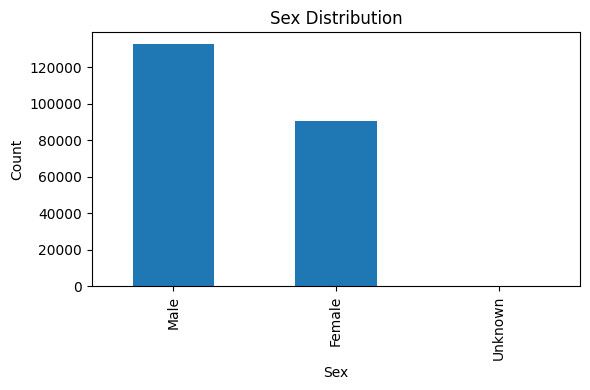

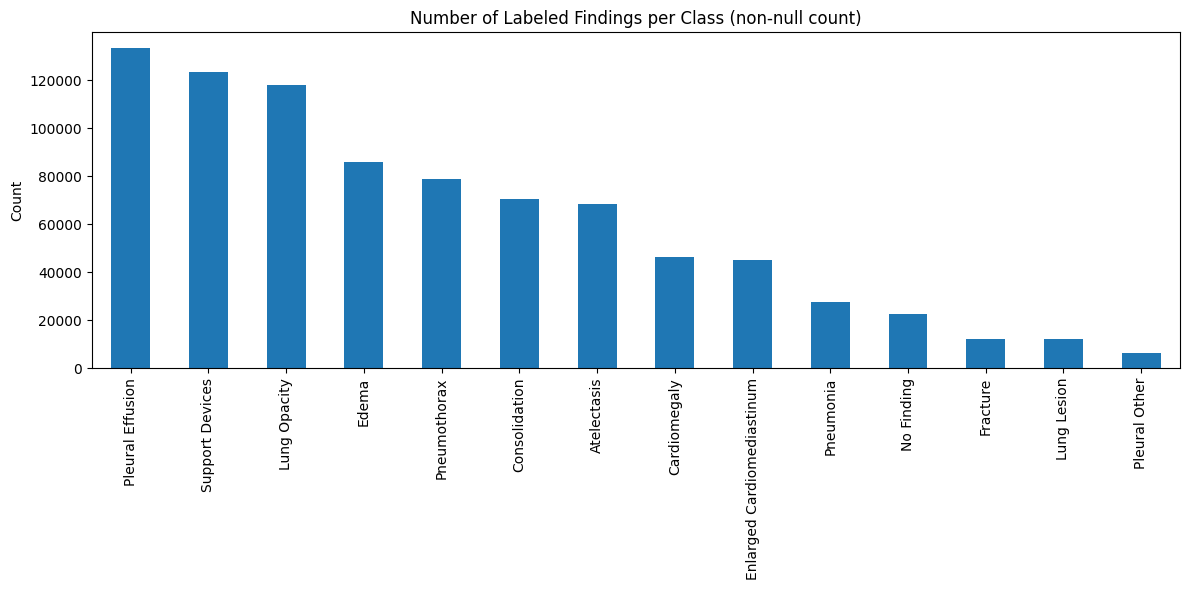

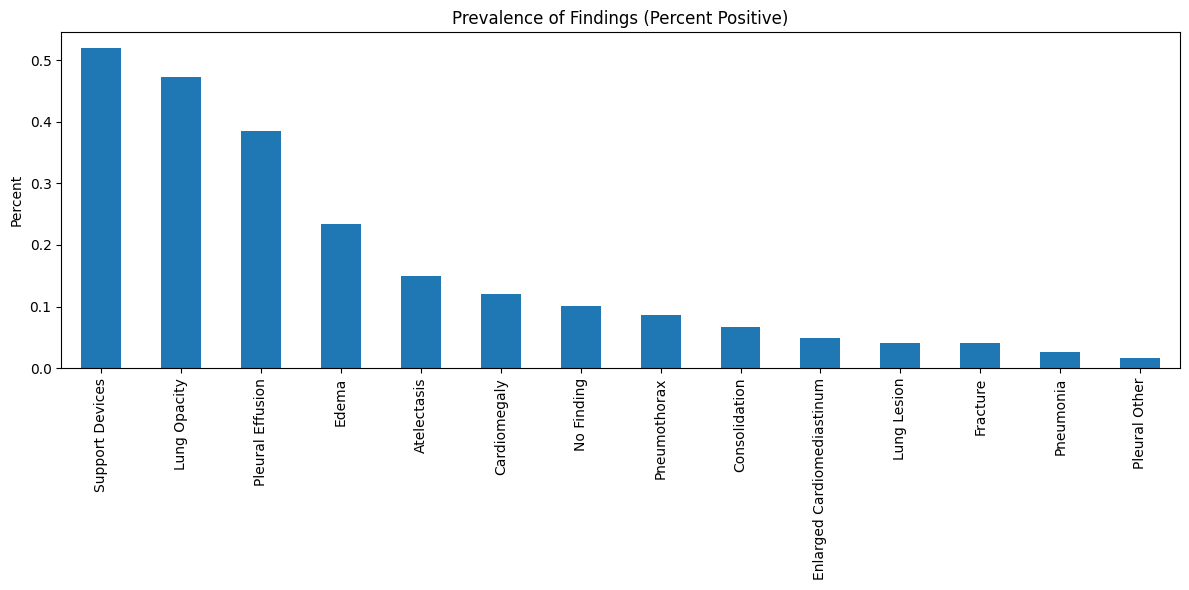


===== PREVALENCE TABLE =====
Support Devices               0.519220
Lung Opacity                  0.472580
Pleural Effusion              0.385773
Edema                         0.233853
Atelectasis                   0.149391
Cardiomegaly                  0.120852
No Finding                    0.100177
Pneumothorax                  0.087049
Consolidation                 0.066169
Enlarged Cardiomediastinum    0.048332
Lung Lesion                   0.041116
Fracture                      0.040463
Pneumonia                     0.027031
Pleural Other                 0.015769
dtype: float64


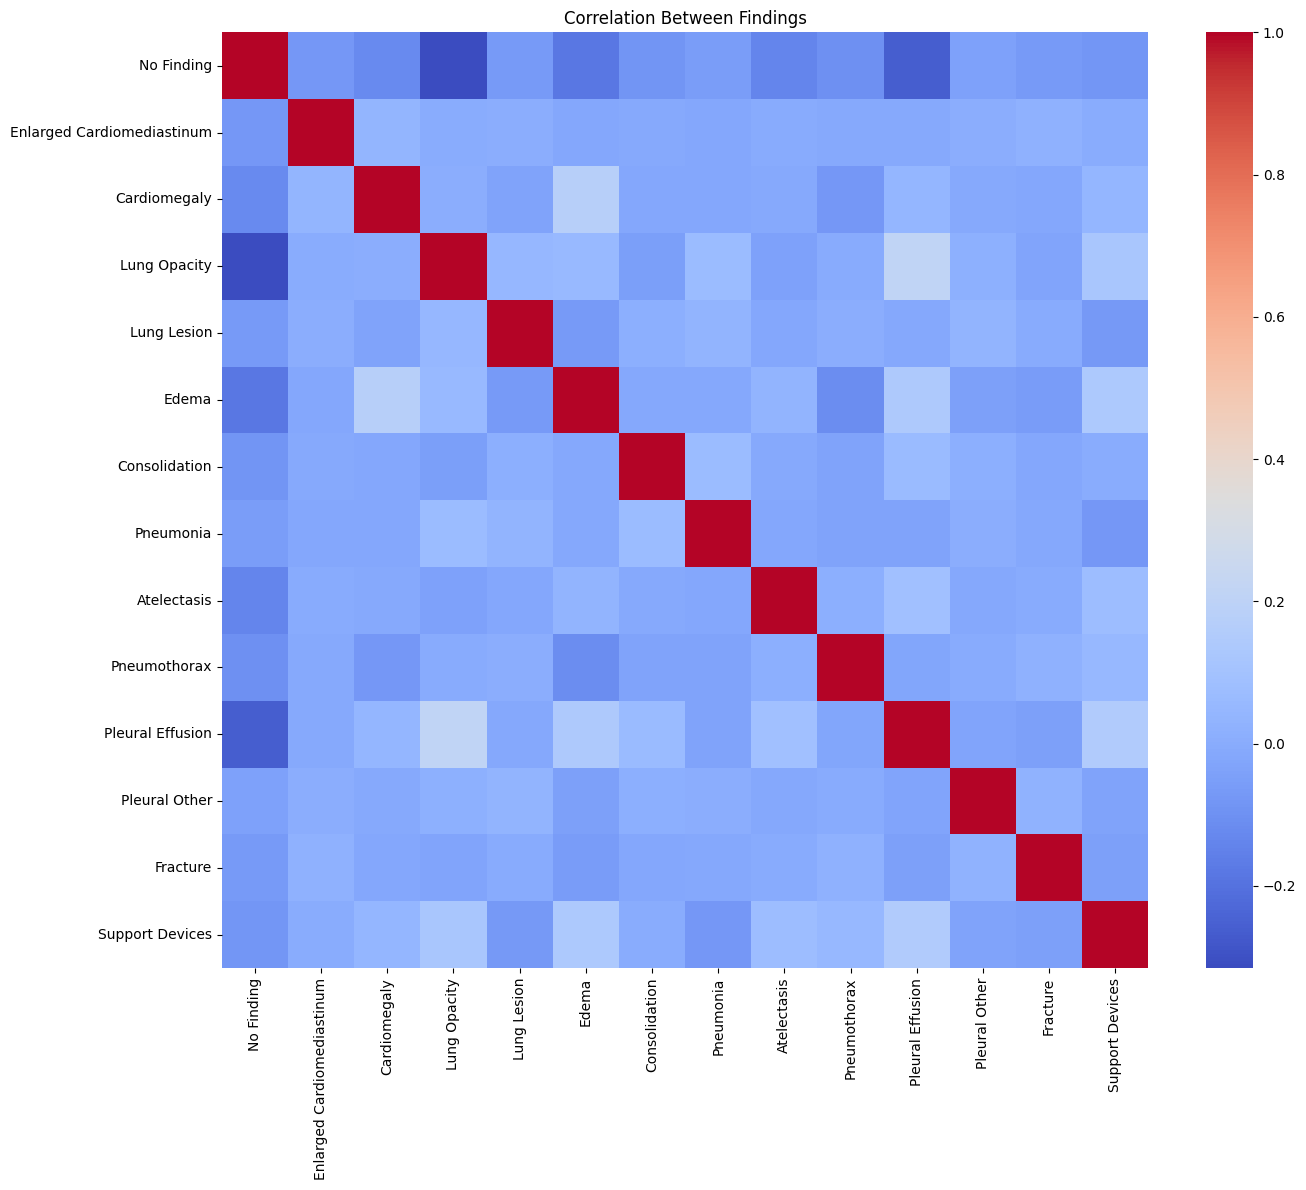


===== CHI-SQUARE TESTS (Sex vs Finding) =====
No Finding                 p = 0.00047
Enlarged Cardiomediastinum  p = 0.00000
Cardiomegaly               p = 0.00000
Lung Opacity               p = 0.00995
Lung Lesion                p = 0.23771
Edema                      p = 0.00000
Consolidation              p = 0.58870
Pneumonia                  p = 0.74439
Atelectasis                p = 0.00000
Pneumothorax               p = 0.00000
Pleural Effusion           p = 0.16341
Pleural Other              p = 0.00001
Fracture                   p = 0.00000
Support Devices            p = 0.00000

===== AGE DIFFERENCES BY FINDING =====
No Finding                 Mann–Whitney p = 0.00000  (n_pos=22381, n_neg=201033)
Enlarged Cardiomediastinum  Mann–Whitney p = 0.09182  (n_pos=10798, n_neg=200213)
Cardiomegaly               Mann–Whitney p = 0.00000  (n_pos=27000, n_neg=188327)
Lung Opacity               Mann–Whitney p = 0.00000  (n_pos=105581, n_neg=112235)
Lung Lesion                Mann–Whitney 

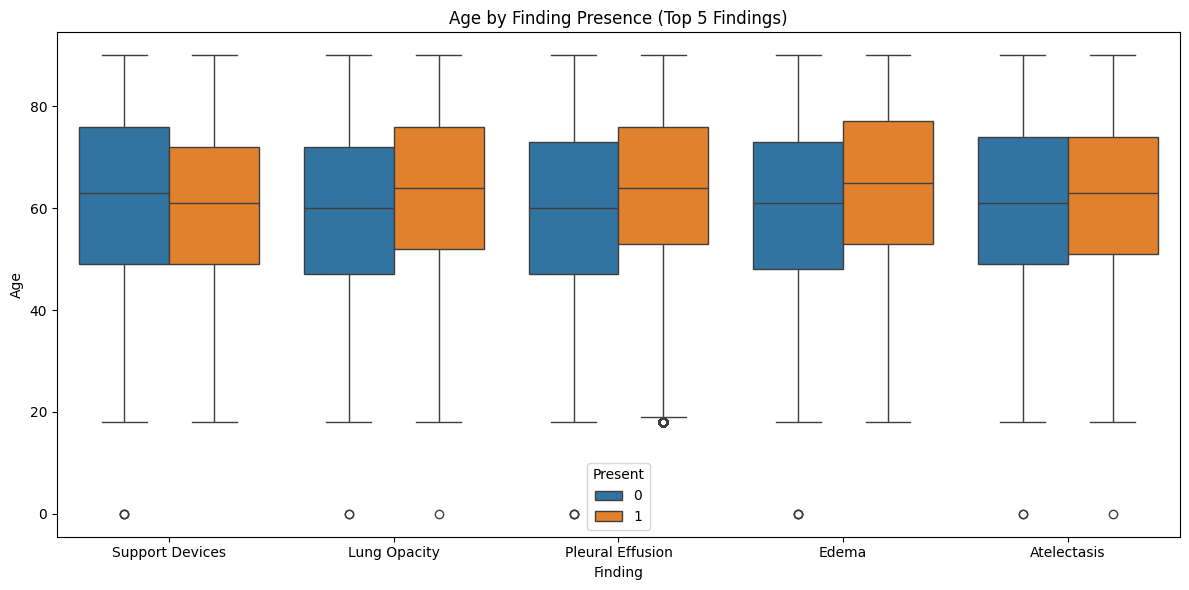

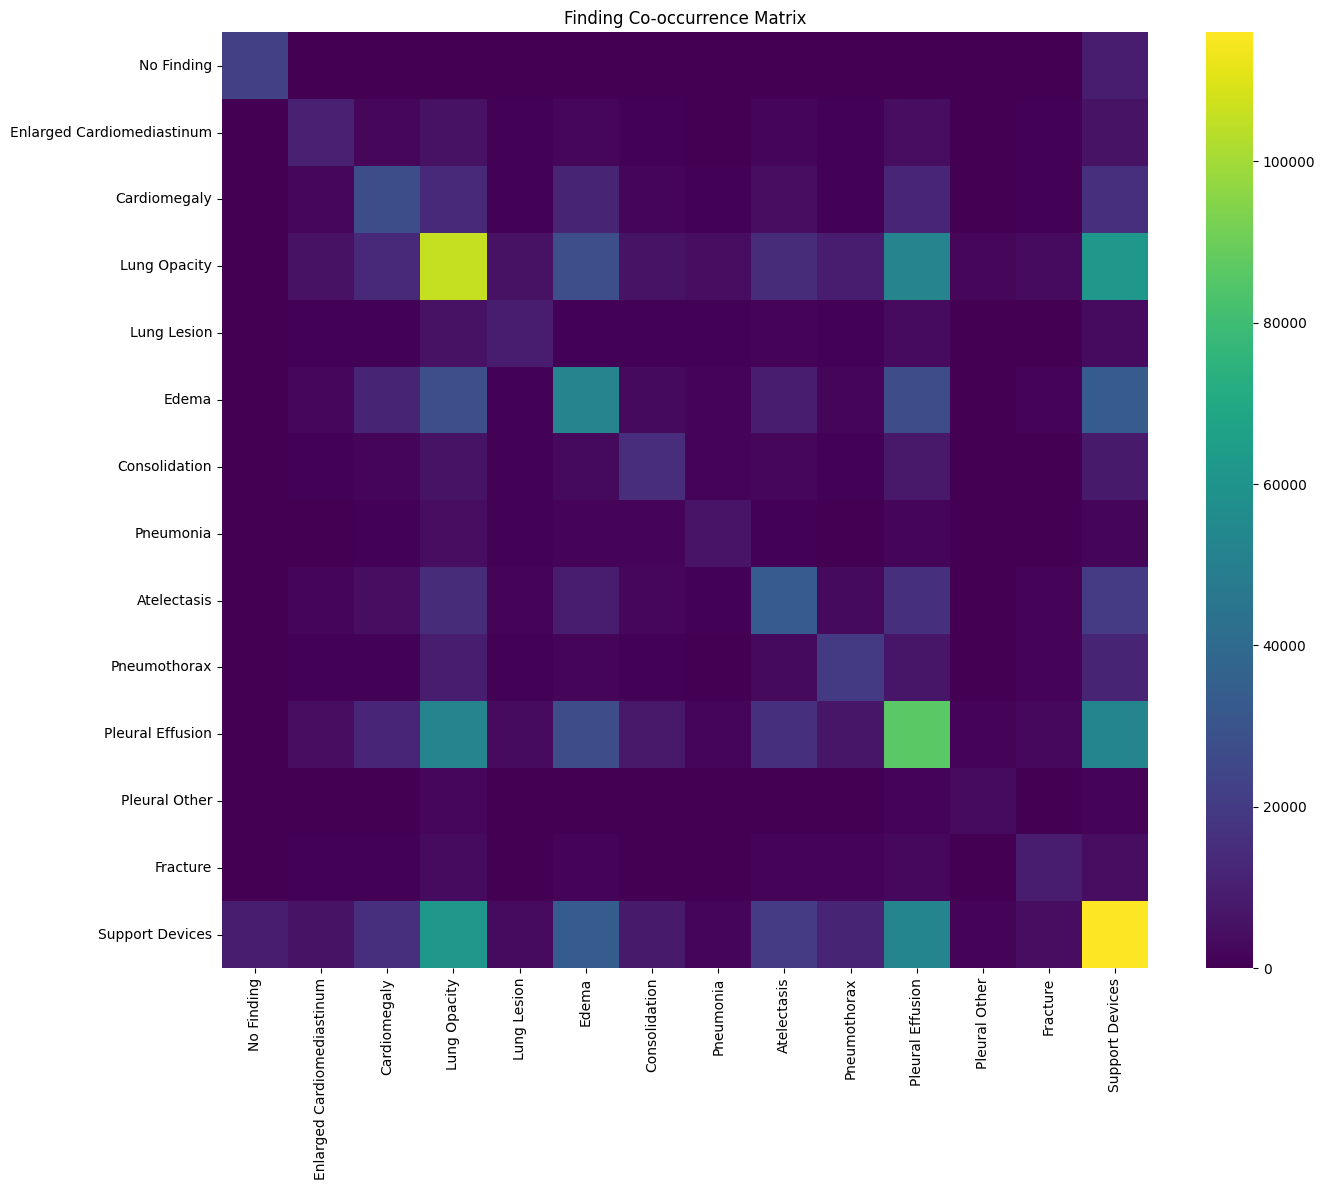

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind

# ------------------------------------------------------------------
# BASIC OVERVIEW
# ------------------------------------------------------------------

print("\n===== BASIC INFO =====")
print(df.info())
print("\n===== BASIC DESCRIPTIVE STATS =====")
print(df.describe(include="all"))

# ------------------------------------------------------------------
# MISSING VALUES
# ------------------------------------------------------------------
plt.figure(figsize=(12, 6))
df.isna().mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Fraction of Missing Values per Column")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# AGE DISTRIBUTION
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=50, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# SEX DISTRIBUTION
# ------------------------------------------------------------------
plt.figure(figsize=(6, 4))
df["Sex"].value_counts().plot(kind="bar")
plt.title("Sex Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# FINDINGS DISTRIBUTION
# ------------------------------------------------------------------
finding_cols = df.columns[5:]  # pathology labels

plt.figure(figsize=(12, 6))
df[finding_cols].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Number of Labeled Findings per Class (non-null count)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# PREVALENCE (PERCENT POSITIVE)
# ------------------------------------------------------------------
prevalence = (df[finding_cols].fillna(0) > 0).mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
prevalence.plot(kind="bar")
plt.title("Prevalence of Findings (Percent Positive)")
plt.ylabel("Percent")
plt.tight_layout()
plt.show()

print("\n===== PREVALENCE TABLE =====")
print(prevalence)

# ------------------------------------------------------------------
# CORRELATION HEATMAP
# ------------------------------------------------------------------
binary_df = (df[finding_cols].fillna(0) > 0).astype(int)
corr = binary_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Between Findings")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# SEX vs FINDINGS (Chi-square tests)
# ------------------------------------------------------------------
print("\n===== CHI-SQUARE TESTS (Sex vs Finding) =====")

for col in finding_cols:
    contingency = pd.crosstab(df["Sex"], (df[col].fillna(0) > 0).astype(int))
    chi2, p, dof, exp = chi2_contingency(contingency)
    print(f"{col:25}  p = {p:.5f}")

# ------------------------------------------------------------------
# AGE vs FINDINGS (t-tests and Mann–Whitney)
# ------------------------------------------------------------------
print("\n===== AGE DIFFERENCES BY FINDING =====")

for col in finding_cols:
    pos = df[df[col].fillna(0) > 0]["Age"]
    neg = df[df[col].fillna(0) == 0]["Age"]

    if len(pos) < 20:
        continue  # too few cases for reliable stats

    # Normality NOT assumed → Mann–Whitney
    u, p_u = mannwhitneyu(pos, neg, alternative="two-sided")

    print(f"{col:25}  Mann–Whitney p = {p_u:.5f}  (n_pos={len(pos)}, n_neg={len(neg)})")

# ------------------------------------------------------------------
# AGE VS PATHOLOGIES BOXPLOT
# ------------------------------------------------------------------
top_5 = prevalence.head(5).index.tolist()
melted = df[["Age"] + top_5].copy()
melted = melted.melt(id_vars="Age", var_name="Finding", value_name="Present")
melted["Present"] = (melted["Present"].fillna(0) > 0).astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x="Finding", y="Age", hue="Present")
plt.title("Age by Finding Presence (Top 5 Findings)")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# FINDINGS CO-OCCURRENCE MATRIX
# ------------------------------------------------------------------
cooc = binary_df.T.dot(binary_df)

plt.figure(figsize=(14, 12))
sns.heatmap(cooc, cmap="viridis", annot=False)
plt.title("Finding Co-occurrence Matrix")
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv("../../datasets/chexpert/5fold_study1/fold1/train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67270 entries, 0 to 67269
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Path                        67270 non-null  object 
 1   Sex                         67270 non-null  object 
 2   Age                         67270 non-null  int64  
 3   Frontal/Lateral             67270 non-null  object 
 4   AP/PA                       67270 non-null  object 
 5   No Finding                  67270 non-null  float64
 6   Enlarged Cardiomediastinum  67270 non-null  float64
 7   Cardiomegaly                67270 non-null  float64
 8   Lung Opacity                67270 non-null  float64
 9   Lung Lesion                 67270 non-null  float64
 10  Edema                       67270 non-null  float64
 11  Consolidation               67270 non-null  float64
 12  Pneumonia                   67270 non-null  float64
 13  Atelectasis                 672

In [9]:
df.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,fold
count,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000
mean,60.034845,0.131203,0.054972,0.112517,0.440196,0.041772,0.216441,0.058287,0.028482,0.148238,0.070804,0.314761,0.015014,0.046826,0.475799,2.499970
std,18.120518,0.337624,0.227928,0.316003,0.496414,0.200069,0.411821,0.234288,0.166347,0.355339,0.256499,0.464424,0.121610,0.211268,0.499418,1.118042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000
50%,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,74.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
